<a href="https://colab.research.google.com/github/yykkcc/Stable-Diffusion/blob/main/Stable_Diffusion_from_Scratch.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
! gdown --id 16dgMCLNO1RhTcj8DALfMJFN7sMZWndPu

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=16dgMCLNO1RhTcj8DALfMJFN7sMZWndPu
From (redirected): https://drive.google.com/uc?id=16dgMCLNO1RhTcj8DALfMJFN7sMZWndPu&confirm=t&uuid=4216c919-f1b7-4841-89fe-e353d6c24175
To: /content/v1-5-pruned-emaonly.ckpt
100% 4.27G/4.27G [02:04<00:00, 34.3MB/s]


In [3]:
! gdown --id 1xaUhKRv8z3cIKVoM73q-4SF8BKZoqxUd

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From (original): https://drive.google.com/uc?id=1xaUhKRv8z3cIKVoM73q-4SF8BKZoqxUd
From (redirected): https://drive.google.com/uc?id=1xaUhKRv8z3cIKVoM73q-4SF8BKZoqxUd&confirm=t&uuid=0151ade2-7f47-434f-8019-563742750fba
To: /content/hollie-mengert.ckpt
100% 2.13G/2.13G [00:30<00:00, 69.4MB/s]


In [1]:
# 安装torch, numpy, tqdm, transformers, lightning, pillow
!pip install torch==2.0.1 numpy==1.25.0 tqdm==4.65.0 transformers==4.33.2 lightning==2.0.9 pillow==9.5.0


Using device: cuda


100%|██████████| 250/250 [00:26<00:00,  9.60it/s]


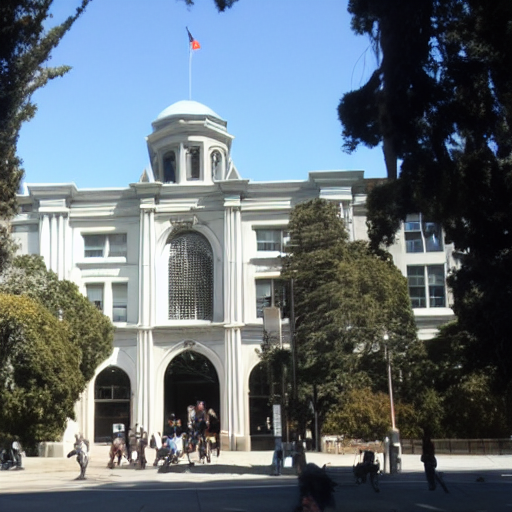

In [15]:

import model_loader
import pipeline
from PIL import Image
from pathlib import Path
from transformers import CLIPTokenizer
import torch

DEVICE = "cuda"

ALLOW_CUDA = True
ALLOW_MPS = True

if torch.cuda.is_available() and ALLOW_CUDA:
    DEVICE = "cuda"
elif (torch.has_mps or torch.backends.mps.is_available()) and ALLOW_MPS:
    DEVICE = "mps"
print(f"Using device: {DEVICE}")

tokenizer = CLIPTokenizer("vocab.json", merges_file="merges.txt")
model_file = "v1-5-pruned-emaonly.ckpt"
models = model_loader.preload_models_from_standard_weights(model_file, DEVICE)

## TEXT TO IMAGE

# prompt = "A dog with sunglasses, wearing comfy hat, looking at camera, highly detailed, ultra sharp, cinematic, 100mm lens, 8k resolution."
prompt = "UC Berkeley"
uncond_prompt = ""  # Also known as negative prompt
do_cfg = True
cfg_scale = 8  # min: 1, max: 14

## IMAGE TO IMAGE

input_image = None
# Comment to disable image to image
image_path = "../images/dog.jpg"
# input_image = Image.open(image_path)
# Higher values means more noise will be added to the input image, so the result will further from the input image.
# Lower values means less noise is added to the input image, so output will be closer to the input image.
strength = 0.9

## SAMPLER

sampler = "ddpm"
num_inference_steps = 250
seed = 42

output_image = pipeline.generate(
    prompt=prompt,
    uncond_prompt=uncond_prompt,
    input_image=input_image,
    strength=strength,
    do_cfg=do_cfg,
    cfg_scale=cfg_scale,
    sampler_name=sampler,
    n_inference_steps=num_inference_steps,
    seed=seed,
    models=models,
    device=DEVICE,
    idle_device="cpu",
    tokenizer=tokenizer,
)

# Combine the input image and the output image into a single image.
Image.fromarray(output_image)